# Pytorch Custom Data Creation (from Food101)

In [5]:
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
# Setup data directory
import pathlib
data_dir = pathlib.Path("C:/Users/ToanTo/Desktop/food101-classifier/food101-classifier/data/raw")

## Download data
Get the Food101 dataset from Pytorch.

Food101 in 'torchvision.datasets' - [https://docs.pytorch.org/vision/stable/generated/torchvision.datasets.Food101.html](url)

Original Food101 dataset - [https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/](url)

In [6]:
# Get training data
train_data = datasets.Food101(root=data_dir,
                              split="train",
                              # transform=transforms.ToTensor(),
                              download=True)

# Get testing data
test_data = datasets.Food101(root=data_dir,
                             split="test",
                             # transform=transforms.ToTensor(),
                             download=True)

100%|██████████| 5.00G/5.00G [34:27<00:00, 2.42MB/s]   


In [7]:
train_data

Dataset Food101
    Number of datapoints: 75750
    Root location: C:\Users\ToanTo\Desktop\food101-classifier\food101-classifier\data\raw
    split=train

In [8]:
class_names = train_data.classes
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

churros


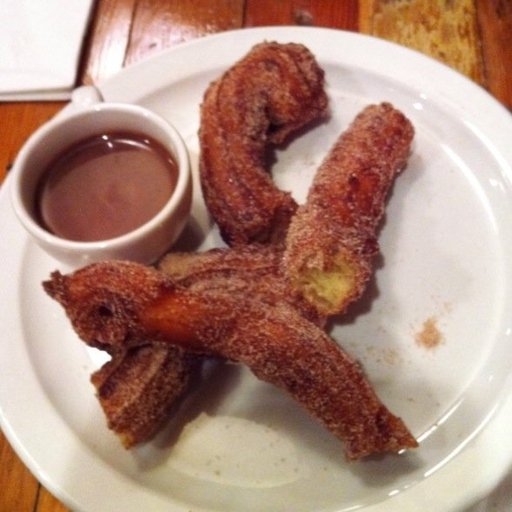

In [10]:
# View first sample (PIL Image format)
print(class_names[train_data[0][1]])
train_data[0][0]

## Find subset of appropriate classes

Current path setup: 

C:/Users/ToanTo/Desktop/food101-classifier/food101-classifier/data/raw/food-101/images/CLASS_NAME/IMAGES.jpg

Going to get a list of the 10 different target image classes (pizza, steak, sushi, hamburger, ice_cream, french_fries, chicken_wings, caesar_salad, chocolate_cake, tiramisu)

I would like to get a random 20% of the images from the target classes from both datasets.

In [12]:
# Get random 20% of training images
import random

# Setup data paths
data_path = data_dir / "food-101" / "images"
target_classes = ["pizza", "steak", "sushi", "hamburger", "ice_cream", "french_fries", "chicken_wings", "caesar_salad", "chocolate_cake", "tiramisu"]

# Change amount of data to get (e.g. 0.1 = random 10%, 0.2 = random 20%)
amount_to_get = 0.2

# Create function to separate a random amount of data
def get_subset(image_path=data_path,
               data_splits=["train", "test"], 
               target_classes=["pizza", "steak", "sushi"],
               amount=0.1,
               seed=42):
    random.seed(42)
    label_splits = {}
    
    # Get labels
    for data_split in data_splits:
        print(f"[INFO] Creating image split for: {data_split}...")
        label_path = data_dir / "food-101" / "meta" / f"{data_split}.txt"
        with open(label_path, "r") as f:
            labels = [line.strip("\n") for line in f.readlines() if line.split("/")[0] in target_classes] 
        
        # Get random subset of target classes image ID's
        number_to_sample = round(amount * len(labels))
        print(f"[INFO] Getting random subset of {number_to_sample} images for {data_split}...")
        sampled_images = random.sample(labels, k=number_to_sample)
        
        # Apply full paths
        image_paths = [pathlib.Path(str(image_path / sample_image) + ".jpg") for sample_image in sampled_images]
        label_splits[data_split] = image_paths
    return label_splits
        
label_splits = get_subset(target_classes = target_classes, amount = amount_to_get)
label_splits["train"][:10]

[INFO] Creating image split for: train...
[INFO] Getting random subset of 1500 images for train...
[INFO] Creating image split for: test...
[INFO] Getting random subset of 500 images for test...


[WindowsPath('C:/Users/ToanTo/Desktop/food101-classifier/food101-classifier/data/raw/food-101/images/pizza/959901.jpg'),
 WindowsPath('C:/Users/ToanTo/Desktop/food101-classifier/food101-classifier/data/raw/food-101/images/chicken_wings/172970.jpg'),
 WindowsPath('C:/Users/ToanTo/Desktop/food101-classifier/food101-classifier/data/raw/food-101/images/caesar_salad/2001907.jpg'),
 WindowsPath('C:/Users/ToanTo/Desktop/food101-classifier/food101-classifier/data/raw/food-101/images/sushi/1277864.jpg'),
 WindowsPath('C:/Users/ToanTo/Desktop/food101-classifier/food101-classifier/data/raw/food-101/images/french_fries/1020588.jpg'),
 WindowsPath('C:/Users/ToanTo/Desktop/food101-classifier/food101-classifier/data/raw/food-101/images/chocolate_cake/3364401.jpg'),
 WindowsPath('C:/Users/ToanTo/Desktop/food101-classifier/food101-classifier/data/raw/food-101/images/chocolate_cake/2533462.jpg'),
 WindowsPath('C:/Users/ToanTo/Desktop/food101-classifier/food101-classifier/data/raw/food-101/images/chicken

## Move training and testing images to dedicated folders

In [13]:
# Create target directory path
target_dir_name = f"C:/Users/ToanTo/Desktop/food101-classifier/food101-classifier/data/processed/custom_data_{str(int(amount_to_get*100))}_percent"
print(f"Creating directory: '{target_dir_name}'")

# Setup the directories
target_dir = pathlib.Path(target_dir_name)

# Make the directories
target_dir.mkdir(parents=True, exist_ok=True)

Creating directory: 'C:/Users/ToanTo/Desktop/food101-classifier/food101-classifier/data/processed/custom_data_20_percent'


In [15]:
import shutil

for image_split in label_splits.keys():
    for image_path in label_splits[str(image_split)]:
        dest_dir = target_dir / image_split / image_path.parent.stem / image_path.name
        if not dest_dir.parent.is_dir():
            dest_dir.parent.mkdir(parents=True, exist_ok=True)
        print(f"[INFO] Copying {image_path} to {dest_dir}...")
        shutil.copy2(image_path, dest_dir)

[INFO] Copying C:\Users\ToanTo\Desktop\food101-classifier\food101-classifier\data\raw\food-101\images\pizza\959901.jpg to C:\Users\ToanTo\Desktop\food101-classifier\food101-classifier\data\processed\custom_data_20_percent\train\pizza\959901.jpg...
[INFO] Copying C:\Users\ToanTo\Desktop\food101-classifier\food101-classifier\data\raw\food-101\images\chicken_wings\172970.jpg to C:\Users\ToanTo\Desktop\food101-classifier\food101-classifier\data\processed\custom_data_20_percent\train\chicken_wings\172970.jpg...
[INFO] Copying C:\Users\ToanTo\Desktop\food101-classifier\food101-classifier\data\raw\food-101\images\caesar_salad\2001907.jpg to C:\Users\ToanTo\Desktop\food101-classifier\food101-classifier\data\processed\custom_data_20_percent\train\caesar_salad\2001907.jpg...
[INFO] Copying C:\Users\ToanTo\Desktop\food101-classifier\food101-classifier\data\raw\food-101\images\sushi\1277864.jpg to C:\Users\ToanTo\Desktop\food101-classifier\food101-classifier\data\processed\custom_data_20_percent\t

In [16]:
# Check lengths of directories
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  import os
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
    
walk_through_dir(target_dir)

There are 2 directories and 0 images in 'C:\Users\ToanTo\Desktop\food101-classifier\food101-classifier\data\processed\custom_data_20_percent'.
There are 10 directories and 0 images in 'C:\Users\ToanTo\Desktop\food101-classifier\food101-classifier\data\processed\custom_data_20_percent\test'.
There are 0 directories and 40 images in 'C:\Users\ToanTo\Desktop\food101-classifier\food101-classifier\data\processed\custom_data_20_percent\test\caesar_salad'.
There are 0 directories and 60 images in 'C:\Users\ToanTo\Desktop\food101-classifier\food101-classifier\data\processed\custom_data_20_percent\test\chicken_wings'.
There are 0 directories and 55 images in 'C:\Users\ToanTo\Desktop\food101-classifier\food101-classifier\data\processed\custom_data_20_percent\test\chocolate_cake'.
There are 0 directories and 47 images in 'C:\Users\ToanTo\Desktop\food101-classifier\food101-classifier\data\processed\custom_data_20_percent\test\french_fries'.
There are 0 directories and 40 images in 'C:\Users\ToanTo